In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import itertools
# import NOTEARS
import notears.nt_linear as nt
import notears.nt_nonlinear as ntn
from dag_generator import DAGGenerator
from sklearn.preprocessing import scale
from scipy.special import expit as sigmoid
from scipy.stats import entropy
from matplotlib import animation
import seaborn as sns
import matplotlib as mpl
from cdt.metrics import SHD

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

# Manipulations
This notebook contains all possible manipulations on 3-node variable systems using varsortability. 

## ToC
1. Chains
    - Revert Chain
    - Introduce Fork
    - Introduce Collider
2. Forks
    - Convert Fork to Chain
    - Change Fork's origin
    - Introduce Collider
3. Colliders
    - Convert Collider into Fork
    - Convert Collider into Chain
    - Change Collider's sink node

In [3]:
SAMPLE_SIZE = 10000
NODE_SIZE = 2000
ARROW_SIZE = 20
LINEWIDTH = 1

## 1. Chains

### Revert Chain

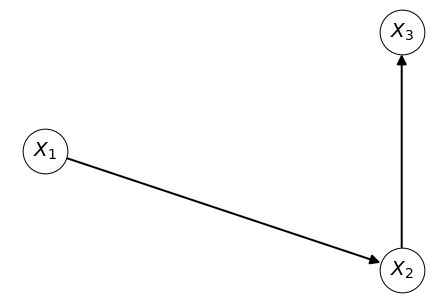

In [154]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
#fig = plt.figure(figsize=(5, 5))
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
#pos = {node: (1, node) for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain.pdf')

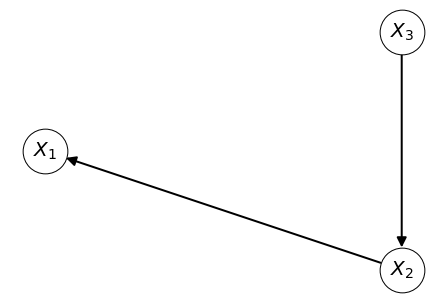

In [144]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T

gdata = scale(gdata)

gdata[:, 0] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain_reverse.pdf')

### Create Fork

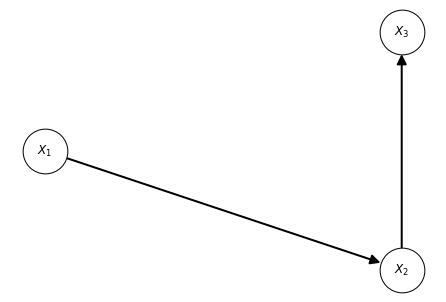

In [98]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
#pos = {node: (1, node) for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)

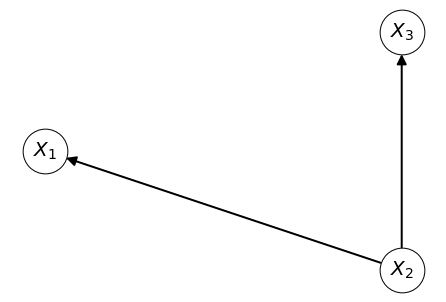

In [145]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 0.5
#gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain2fork.pdf')

### Creating Collider

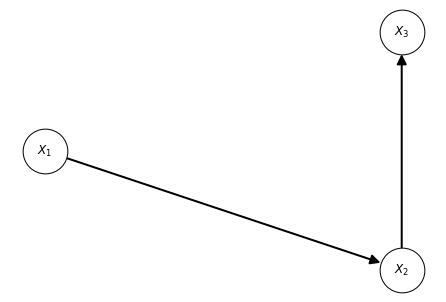

In [100]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (node, 1) for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-predictions-3-nodes/chain2collider.pdf')

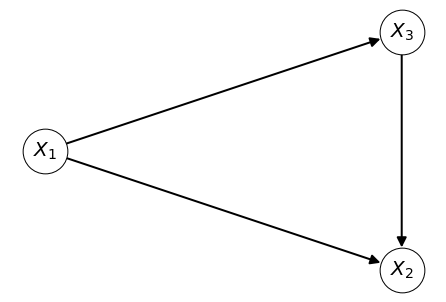

In [146]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
#gdata = scale(gdata)

gdata[:, 1] *= 4

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
edge_colors = ['black' if edge != (0, 2) else 'red' for edge in nt_pred_nx.edges]
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/chain2collider.pdf')

In [10]:
lhs = -(np.cov(gdata[:, 2], gdata[:, 1])[0, 1]**2 / np.var(gdata[:, 2])) \
        - 2*(np.cov(gdata[:, 0], gdata[:, 1])[0, 1] / np.var(gdata[:, 0])*np.cov(gdata[:, 1], gdata[:, 2])[0, 1] / np.var(gdata[:, 2])*np.cov(gdata[:, 0], gdata[:, 2])[0, 1]) \
        - (np.cov(gdata[:, 0], gdata[:, 2])[0, 1]**2 / np.var(gdata[:, 0]))
rhs = -np.cov(gdata[:, 1], gdata[:, 2])[0, 1]**2 / np.var(gdata[:, 1])
print(f"lhs = {lhs} < {rhs} = rhs")

lhs = -43.87632302420148 < -1.9990528166486774 = rhs


## 2. Forks

### Fork2Chain

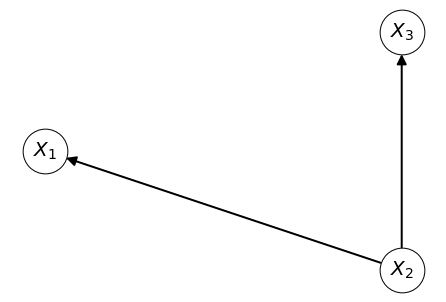

In [153]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/fork.pdf')

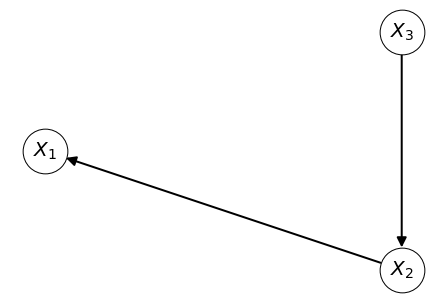

In [147]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 2] *= 3
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/fork2chain.pdf')

### Change Fork origin

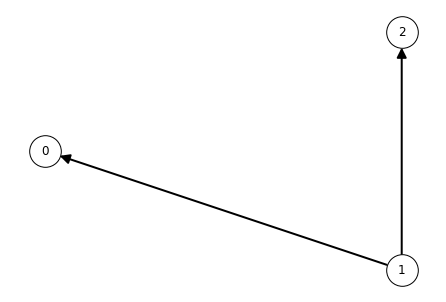

In [33]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)

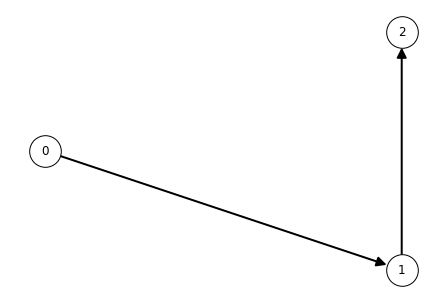

In [34]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2
gdata[:, 2] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)

### Fork2Collider

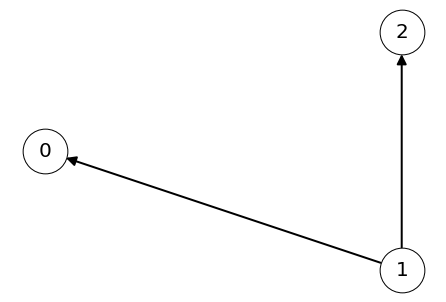

In [128]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)

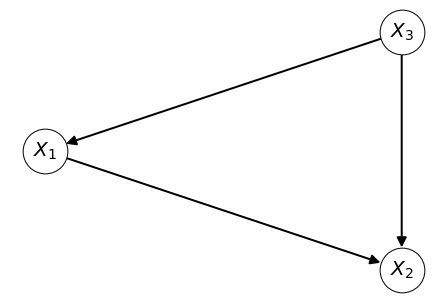

In [148]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/fork2collider.pdf')

## Colliders

### Collider2Chain

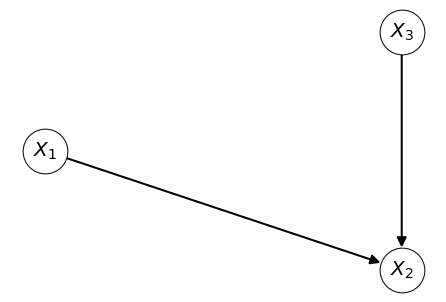

In [152]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
{node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider.pdf')

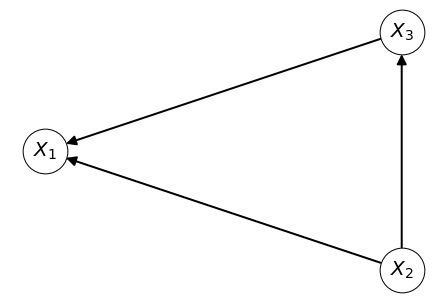

In [149]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 2] *= 3
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
{node: fr"$X_{node + 1}$" for node in G.nodes}
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider2chain.pdf')

### Collider2Fork

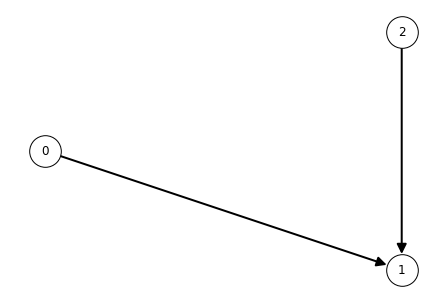

In [39]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)

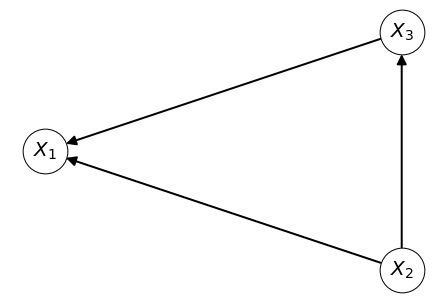

In [150]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

#gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
{node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider2fork.pdf')

### Change Collider sink node

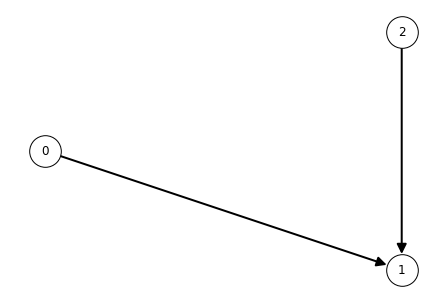

In [41]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', font_size=20)

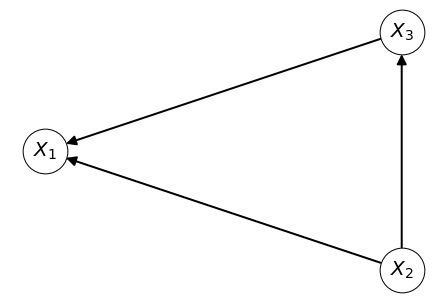

In [151]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./figures/nt-imperfect-3-nodes/collider2collider.pdf')

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


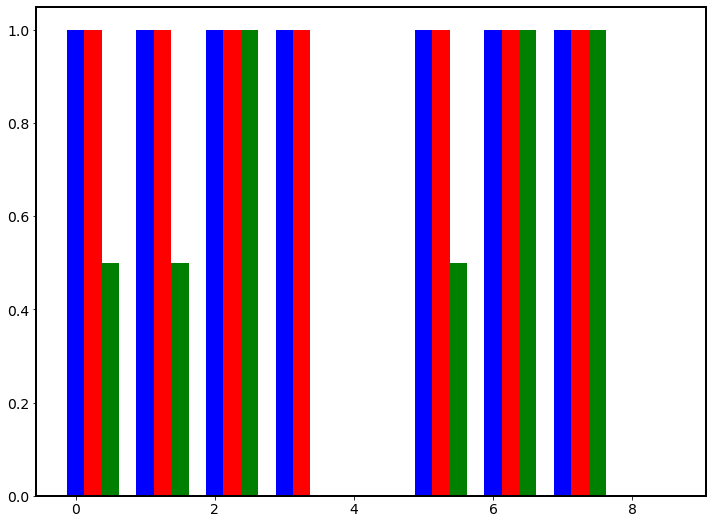

In [3]:
x_ = ['c2rc', 'c2f', 'c2co', 'f2c', 'f2f', 'f2co', 'co2c', 'co2f', 'co2co']
y = [[1, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 1, 0, 1, 1, 1, 0], [0.5, 0.5, 1, 0, 0, 0.5, 1, 1, 0]]
x = np.arange(len(x_))
fig = plt.figure(figsize=(12, 9))
plt.bar(x + 0, y[0], color='b', width=0.25)
plt.bar(x + 0.25, y[1], color='r', width=0.25)
plt.bar(x + 0.5, y[2], color='g', width=0.25)
plt.show()

## Perfect Scenario: 10 nodes

In [68]:
def rescale(data, scales_dict, resacle=True):
    if resacle:
        sdata = scale(data)
    else:
        sdata = data
    for idx, s in scales_dict.items():
        sdata[:, idx] *= s
    return sdata

In [69]:
def create_n_node_chain(num_nodes, noise, f):
    data = []
    x = noise()
    for i in range(num_nodes):
        x = f(np.copy(x)) + noise()
        data.append(x)
    return np.stack(data).T

In [70]:
def create_10_nodes_fork(orig_node, noise, f):
    assert orig_node < 9 and orig_node > 0, 'Fork origin must not be any outer node'
    x = noise()
    data = np.zeros((SAMPLE_SIZE, 10))
    data[:, orig_node] = x
    for i in np.arange(orig_node - 1, -1, -1):
        data[:, i] = f(data[:, i + 1]) + noise()
    for i in np.arange(orig_node + 1, 10):
        data[:, i] = f(data[:, i - 1]) + noise()
    return np.stack(data)

In [71]:
def create_10_nodes_collider(coll_node, noise, f):
    assert coll_node < 9 and coll_node > 0, 'Collider must not be any outer node'
    x_l, x_r = noise(), noise()
    data = np.zeros((SAMPLE_SIZE, 10))
    data[:, 0] = x_l
    data[:, -1] = x_r
    for i in np.arange(1, coll_node):
        data[:, i] = f(data[:, i - 1]) + noise()
    for i in np.arange(8, coll_node, -1):
        data[:, i] = f(data[:, i + 1]) + noise()
    data[:, coll_node] = f(data[:, coll_node - 1] + data[:, coll_node + 1]) + noise()
    return np.stack(data)

In [72]:
def f(data):
    return 1.2 * data

## Chains

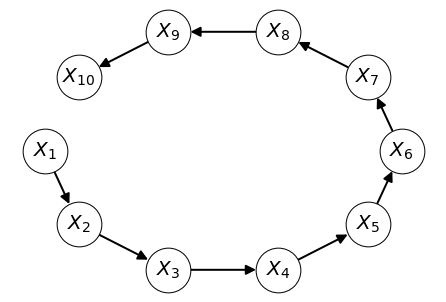

In [73]:
adj = np.zeros((10, 10))
for i in range(0, 9):
    adj[i, i+1] = 1
nt_pred_nx = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain.pdf')

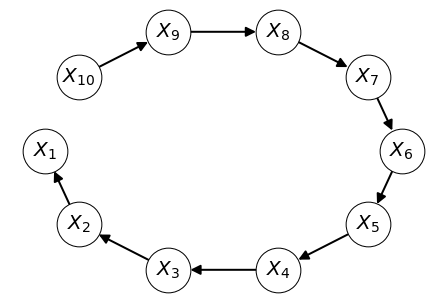

In [74]:
# reverse chain
data = create_n_node_chain(10, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {i: s for i, s in enumerate(np.arange(18, 0, -2))} 
#scale_dict = {0: 8}
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain_reverse.pdf')

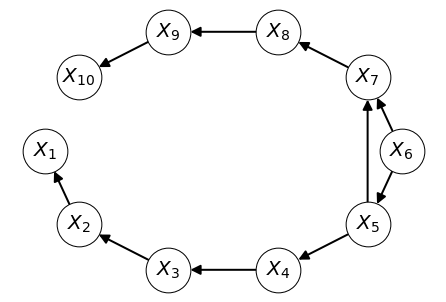

In [85]:
# introduce fork
data = create_n_node_chain(10, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 4.5, 1: 4, 2: 3.5, 3: 3, 4: 2, 5: 1, 6: 2, 7: 3, 8: 3.5, 9: 4}
#scale_dict = {5: 1/3}
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2', w_threshold=0.3)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain2fork.pdf')

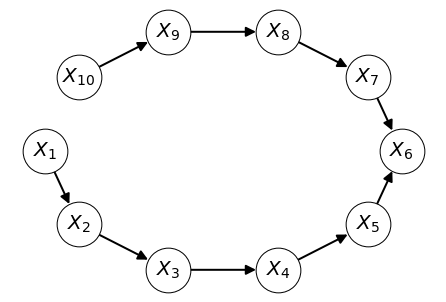

In [106]:
# introduce collider
data = create_n_node_chain(10, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 8, 6: 5, 7: 4, 8: 3, 9: 2}
#scale_dict = {5: 6}
scaled_data = rescale(data, scale_dict, True)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2', w_threshold=0.6)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./chain2collider.svg')

## Forks

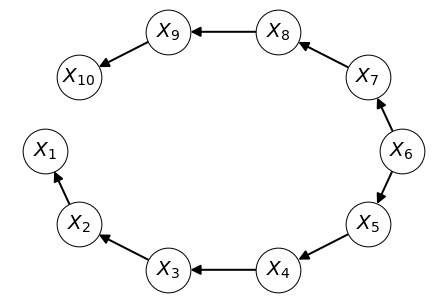

In [77]:
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
nt_pred_scaled = nt.notears_linear(data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork.pdf')

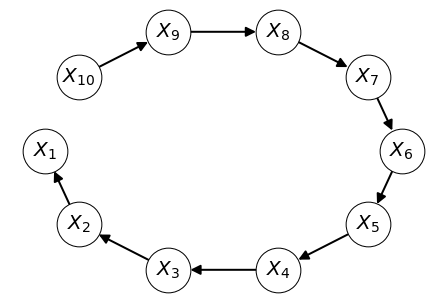

In [78]:
# fork to chain
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {i: s for i, s in enumerate(np.arange(18, 0, -2))}
#scale_dict = {0: 8}
scaled_data = rescale(data, scale_dict, True)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork2chain.pdf')

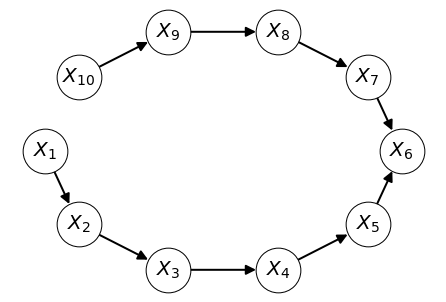

In [79]:
# fork to collider
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 1, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2}
#scale_dict = {5: 6}
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork2collider.pdf')

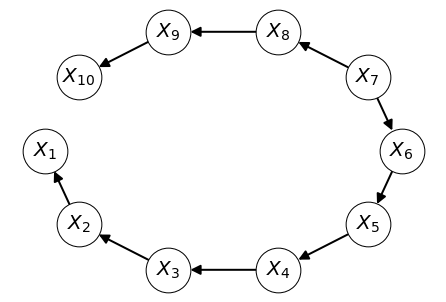

In [80]:
# fork to fork
data = create_10_nodes_fork(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 14, 1: 12, 2: 10, 3: 8, 4: 6, 5: 4, 6: 1, 7: 2, 8: 4, 9: 6}
#scale_dict = {6: 0.2, 5: 2}
scaled_data = rescale(data, scale_dict, False)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./fork2fork.pdf')

## Colliders

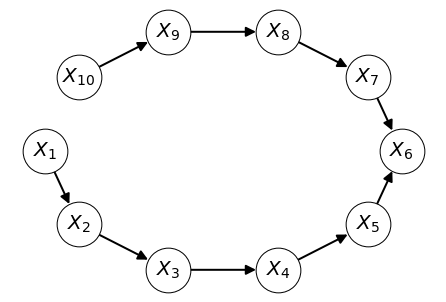

In [81]:
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
nt_pred_scaled = nt.notears_linear(data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider.pdf')

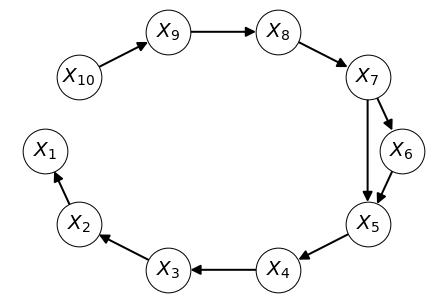

In [82]:
# collider to chain
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {i: s for i, s in enumerate(np.arange(18, 0, -2))}
#scale_dict = {0: 8} 
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider2chain.pdf')

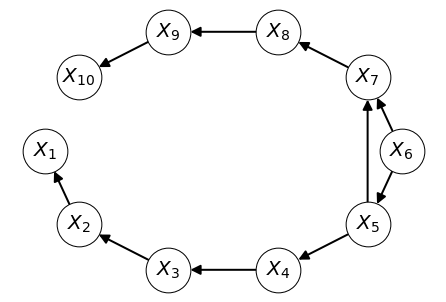

In [83]:
# collider to fork
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 10, 1: 8, 2: 6, 3: 4, 4: 2, 5: 1, 6: 2, 7: 4, 8: 6, 9: 8}
#scale_dict = {5: 0.5}
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider2fork.pdf')

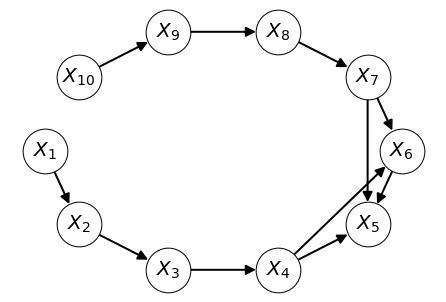

In [84]:
# collider to collider
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
scale_dict = {0: 1, 1: 2, 2: 4, 3: 6, 4: 8, 5: 6, 6: 4, 7: 2, 8: 1, 9: 0.5}
#scale_dict = {4: 6}
scaled_data = rescale(data, scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./collider2collider.pdf')

In [28]:
def f(x):
    return np.cos(x)

In [ ]:
data = create_10_nodes_collider(5, lambda: np.random.normal(0, 1, SAMPLE_SIZE), f)
df = pd.DataFrame(data, columns=list(range(0, 10)))
df.to_csv('./data/n-var-case/non-linear/data/data_10_collider.csv')

## Attacking SNT and DAG-GNN on Sachs Dataset

## Attack params
### Collider DAG-GNN at $X_6$
$X_5$ -> 0.5

$X_6$ -> 2

$X_7$ -> 0.2

### Fork at $X_6$
$X_5$ -> 4

$X_6$ -> 0.5

$X_7$ -> 2

### Chain flip $X_6$
$X_5$ -> 4

$X_6$ -> 0.5

$X_7$ -> 0.2

### Chain $X_2$
$X_2$ -> 10

$X_{10}$ -> 2

$X_7$ -> 0.01

### Collider $X_2$
$X_2$ -> 10

$X_{10}$ -> 0.5

$X_7$ -> 0.01

In [6]:
df = pd.read_csv('./data/real-world/sachs.data.txt', sep='\t')
df.var()

Raf       1750.965664
Mek        753.435220
Plcg       215.293647
PIP2      8744.902945
PIP3      1169.737437
Erk       8080.542215
Akt      16042.829848
PKA     183012.754944
PKC        134.373176
P38        377.210447
Jnk       1857.027108
dtype: float64

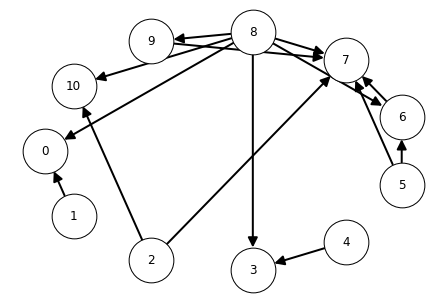

In [42]:
adj = np.loadtxt('./logs/sachs-attacks-dag-gnn/ground_truth')
adj[abs(adj) < 0.3] = 0
adj[abs(adj) >= 0.3] = 1
adj_nx = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [36]:
np.savetxt('attack_2_7_10_collider', adj)

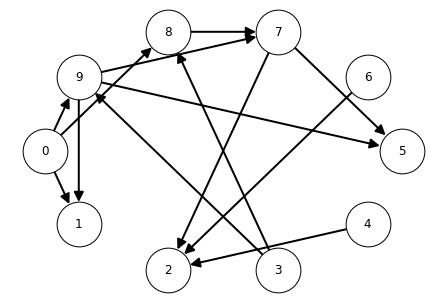

In [65]:
df = pd.read_csv('./repos/MasterThesis/notebooks/data_generation/graphs/graph_10_10.csv', index_col=0)
adj_nx = nx.convert_matrix.from_numpy_array(df.to_numpy(), create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')
plt.savefig('./multi_gt.pdf')

In [60]:
meta = pd.read_csv('./repos/MasterThesis/notebooks/data_generation/data/metadata.csv', index_col=0)
meta[(meta['graph_name'] == 'graph_10_10.csv') & (meta['sample_noise'] == 'gaussian')]

,sample_noise,sample_weights,f,samples,common_cause_to_confounder_fraction,nodes,edges,dataset,graph_name
0,gaussian,weight_sample,linear,2000,1.0,10,13,8d623143-9d6d-452d-a949-5533a2ad9198.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,100,1.0,10,13,3f968670-a311-4500-8ca0-96498f977daa.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,10000,0.0,10,13,de95ce36-a94b-4dcc-bd43-a1dfe158b31f.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,2000,1.0,10,13,ab448a14-7240-4856-8f0f-43d9c826118e.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,100,0.5,10,13,c4b531b7-346a-491e-8380-c1cedc8f1689.csv,graph_10_10.csv
0,gaussian,weight_sample,linear,10000,0.5,10,13,0b428bda-6edf-4ca9-a37a-9f3d08cd4a04.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,100,1.0,10,13,e61485b3-a74d-4997-ba5a-d26e941186ae.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,2000,0.5,10,13,948e9a84-22bb-4def-afab-d3d6237dc21d.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,100,0.0,10,13,d8c73a20-5366-4392-8e7a-44c21ef5b274.csv,graph_10_10.csv
0,gaussian,weight_sample,sigmoid,10000,0.5,10,13,2c61a22b-8487-48fa-8fde-4dc4acdb4177.csv,graph_10_10.csv


In [62]:
data = pd.read_csv('repos/MasterThesis/notebooks/data_generation/data/de95ce36-a94b-4dcc-bd43-a1dfe158b31f.csv', index_col=0)
data

,0,1,2,3,4,5,6,7,8,9
0,1.541340,93.174693,1432.458281,3.562973,-0.278244,1001.006449,-0.577123,165.216314,39.477343,19.292858
1,4.851266,80.636162,1141.970659,-0.914243,-4.139181,771.001442,3.212554,130.764510,33.346792,11.784201
2,-0.399522,37.459822,914.428392,4.455590,1.241077,604.402262,0.057470,104.895538,29.506761,7.626394
3,1.338011,-18.000050,-602.668556,-4.004303,-0.488905,-407.975251,-4.083382,-66.934037,-16.134626,-7.938595
4,-7.088396,-128.948982,-1446.393988,2.067106,-1.528851,-977.112728,-6.733775,-161.628005,-37.598324,-19.556184
...,...,...,...,...,...,...,...,...,...,...
9995,-0.092987,-29.861901,-468.837968,-1.595666,-0.374880,-323.411740,-0.702129,-53.427574,-12.709233,-6.470124
9996,3.230025,10.455724,-121.644647,-3.630137,2.173375,-107.656984,2.604171,-16.691499,-2.826462,-2.781854
9997,-3.746607,-74.670290,-692.146435,1.446112,2.657147,-480.330180,-4.097823,-78.338355,-16.499229,-10.905300
9998,0.139710,49.897250,510.109962,1.600695,0.875306,375.057397,0.459932,58.282996,9.995350,10.452633


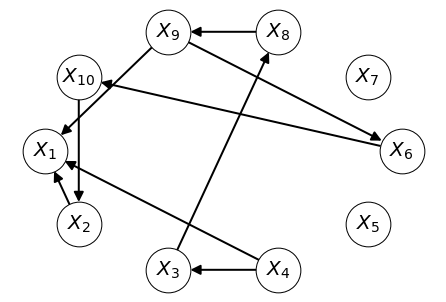

In [67]:
scale_dict = {0: 2}
scaled_data = rescale(data.to_numpy(), scale_dict)

nt_pred_scaled = nt.notears_linear(scaled_data, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred_scaled, create_using=nx.DiGraph)
labels = {node: fr"$X_{{{node + 1}}}$" for node in nt_pred_nx.nodes}
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, font_size=20)
plt.savefig('./multi.pdf')

## SNT

In [45]:
df = pd.read_csv('./data/real-world/sachs.data.txt', sep='\t')
df_nt = df.copy()
for c in df_nt.columns:
    df.loc[:, c] = np.log(df[c])
df_nt = df_nt.to_numpy()
# chain flip
#df_nt[:, 5] *= 5
#df_nt[:, 6] *= 1.5
#df_nt[:, 7] *= 0.01

# fork
#df_nt[:, 5] *= 5
#df_nt[:, 6] *= 0.5
#df_nt[:, 7] *= 1.1

# collider
#df_nt[:, 5] *= 1.5
#df_nt[:, 6] *= 5
#df_nt[:, 7] *= 0.01

# chain flip
#df_nt[:, 8] *= 1.1
#df_nt[:, 9] *= 0.3
#df_nt[:, 10] *= 0.1

# fork
#df_nt[:, 8] *= 3
#df_nt[:, 9] *= 0.3
#df_nt[:, 10] *= 1.1

# collider
df_nt[:, 8] *= 1.1
df_nt[:, 9] *= 3
df_nt[:, 10] *= 0.1

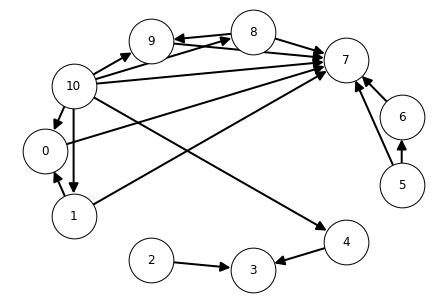

In [46]:
nt_pred = nt.notears_linear(df_nt, 0.05, 'l2')
nt_pred[nt_pred != 0] = 1
adj_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [47]:
np.savetxt('attack_8_9_10_collider', nt_pred)

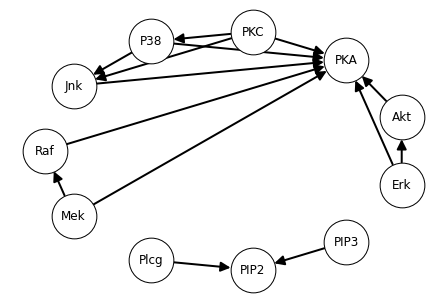

In [95]:
gt = np.loadtxt('./logs/sachs-attack-nt/ground_truth')
pred = np.loadtxt('./logs/sachs-attack-nt/attack_8_9_10_collider')
gt_df = pd.DataFrame(gt, columns=list(df.columns), index=list(df.columns))
exp_adj = gt_df.copy()
#exp_adj.iloc[8, 9] = 0
#exp_adj.iloc[9, 8] = 1
exp_adj.iloc[9, 10] = 0
exp_adj.iloc[10, 9] = 1
#exp_adj.iloc[8, 10] = 0
#exp_adj.iloc[10, 8] = 1
adj_nx = nx.convert_matrix.from_pandas_adjacency(gt_df, create_using=nx.DiGraph)
nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

In [96]:
SHD(exp_adj.to_numpy(), pred)

5.0

In [97]:
SHD(gt, pred)

7.0

In [4]:
import os

attack_2_7_10_collider
attack_5_6_7_chain
attack_2_7_10_chain
attack_5_6_7_collider
ground_truth
attack_5_6_7_fork


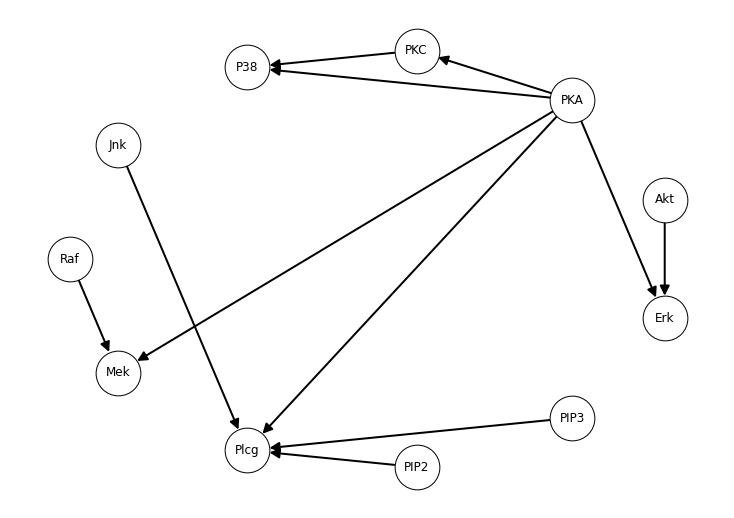

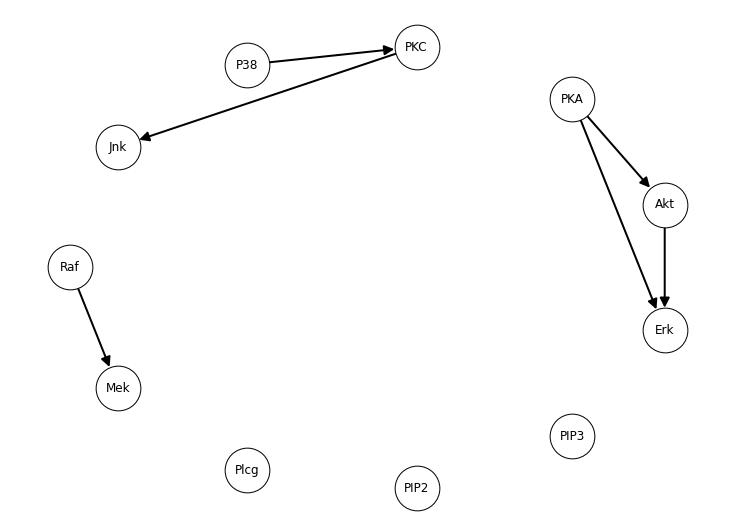

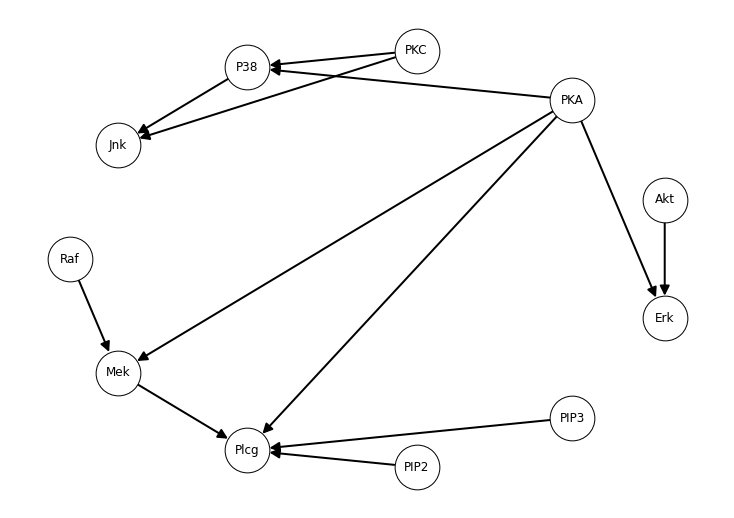

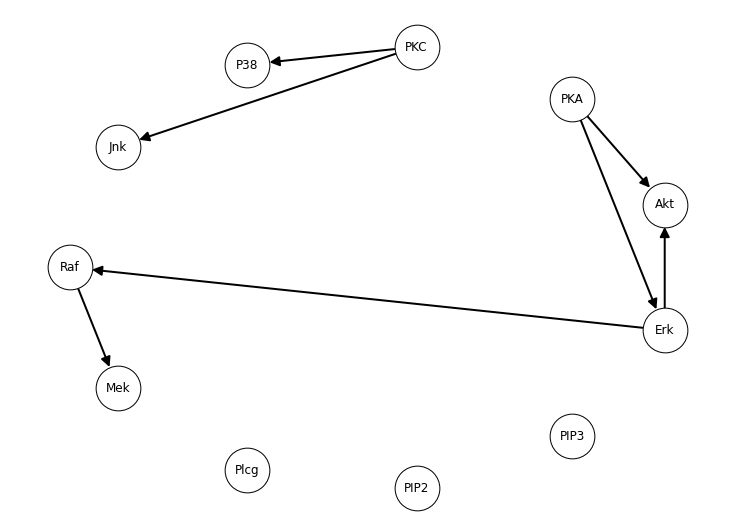

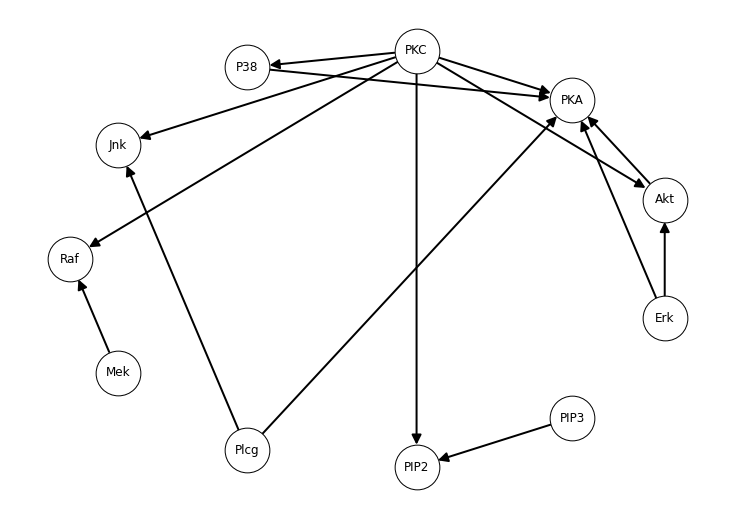

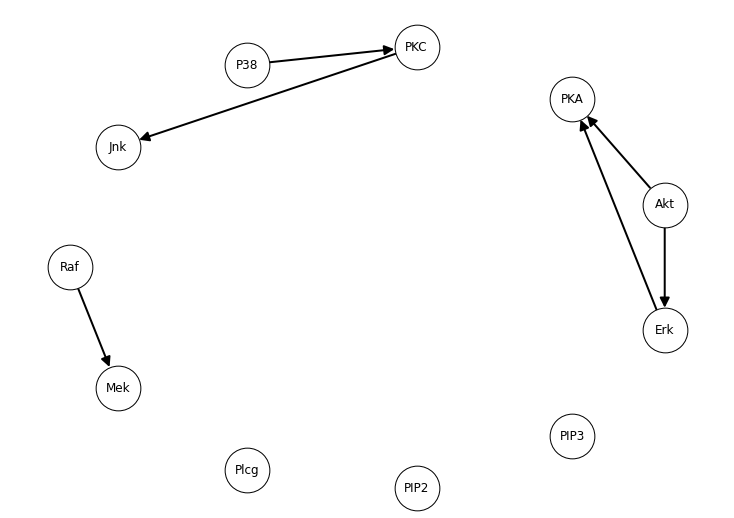

In [17]:
for filename in os.listdir('./logs/sachs-attacks-dag-gnn/'):
    adj = np.loadtxt(f'./logs/sachs-attacks-dag-gnn/{filename}')
    adj = pd.DataFrame(adj, columns=df.columns, index=df.columns)
    adj_nx = nx.convert_matrix.from_pandas_adjacency(adj, create_using=nx.DiGraph)
    fig = plt.figure(figsize=(10, 7))
    print(filename)
    nx.draw_shell(adj_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')
    plt.savefig(f'./figures/daggnn-predictions-sachs/{filename}.svg')

# NT Nonlinear

## 1. Chains
### Reverse Chain

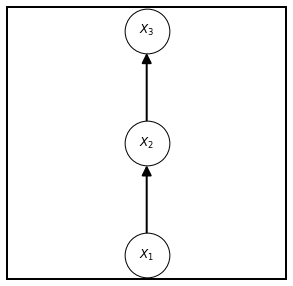

In [5]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
fig = plt.figure(figsize=(5, 5))
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

mgKiwEp4sim2kCKo_YawNnPiTJh7E_oaTWwPHT3s

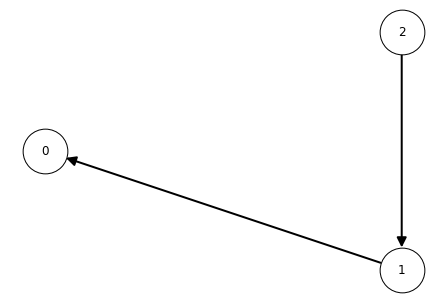

In [4]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 =  sigmoid(X_0 + np.random.normal(0, 1, SAMPLE_SIZE))
X2 = sigmoid(X1 + np.random.normal(0, 1, SAMPLE_SIZE))
gdata = np.array([X_0, X1, X2]).T

gdata = scale(gdata)

gdata[:, 0] *= 3
gdata[:, 1] *= 2

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Create Fork

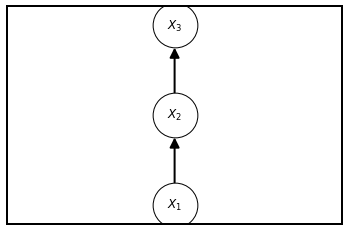

In [5]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

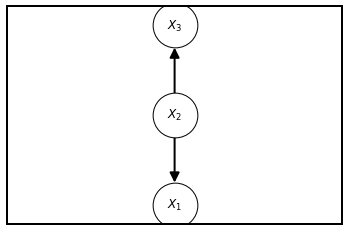

In [6]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = sigmoid(X_0 + np.random.normal(0, 1, SAMPLE_SIZE))
X2 = sigmoid(X1 + np.random.normal(0, 1, SAMPLE_SIZE))
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(nt_pred_nx, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

### Create Collider

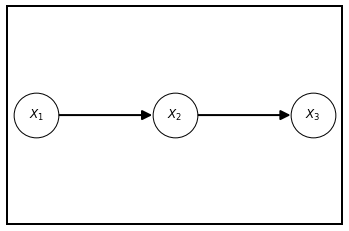

In [7]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (node, 1) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

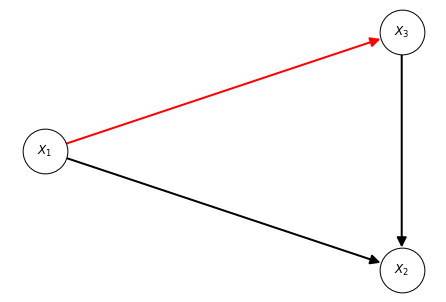

In [8]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
#gdata = scale(gdata)

gdata[:, 1] *= 4

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
edge_colors = ['black' if edge != (0, 2) else 'red' for edge in nt_pred_nx.edges]
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, edge_color=edge_colors)

## 2. Forks

### Fork2Chain

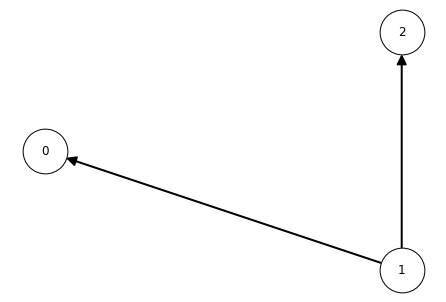

In [9]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

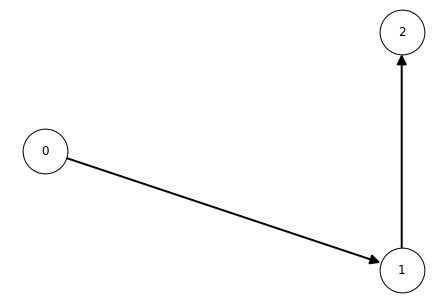

In [10]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

## Fork2Collider

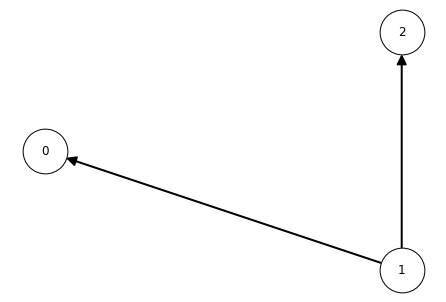

In [11]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

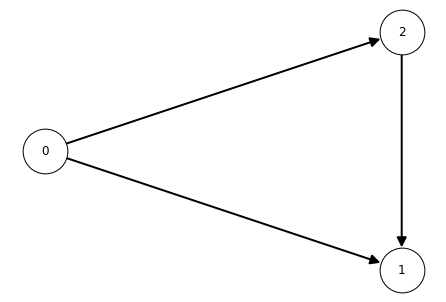

In [12]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

## 3. Colliders

### Collider2Chain

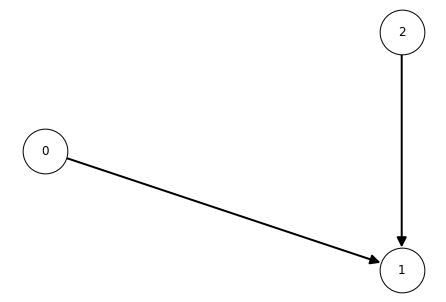

In [13]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

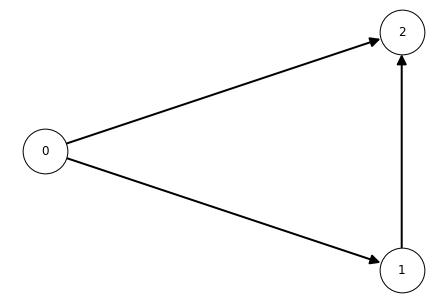

In [14]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Collider2Fork

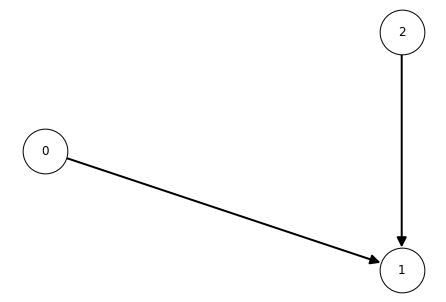

In [15]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

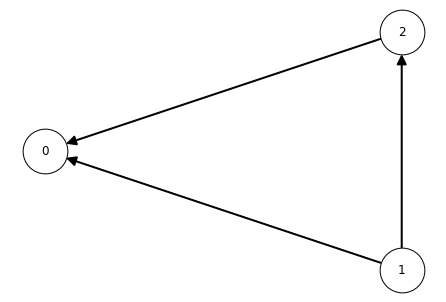

In [16]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

model = ntn.NotearsMLP((3, 2, 1))
nt_pred = ntn.notears_nonlinear(model, gdata, lambda1=0.01, lambda2=0.01)
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')